### BACKGROUND
Your company has collected a lot of ecommerice sales data and has recently hired me as a Data Analyst to obtain insights into your e-commerce products and provide tangible business outcomes from this dataset.

### OBJECTIVE 
Provide insights on customer purchasing behavior

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATASET_PATH = os.path.join(os.getcwd(), 'datasets', 'ecommerce-data.csv')
df = pd.read_csv(DATASET_PATH, encoding = 'ISO-8859-1')

# Initial exploration of dataset

In [2]:
# Look at a few rows to get a feeling for each column 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print(df.shape)
df.nunique()

(541909, 8)


InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

 * 542k items
 * across a total of 26k invoices
 * from 4.4k customers
 * in 38 different countries 

In [4]:
# Check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Check null entries
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Check statistics for columns with numerical values for outliers
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Initial observations
1. `InvoiceNo`, `StockCode`, `Description` and `Country` are object data types. This null-valued descriptions are likely to account for a missing description (ie. `NaN`).
2. `InvoiceDate` is an object and it's best to be of datetime format for time-series analysis
3. `CustomerID` is a float, I would have expected a string or an integer. Perhaps CustomerIDs contain decimals that aren't 0.
4. There are more descriptions than stock codes. I would have expected a one-to-one relationship, or more stock codes than descriptions, given that some are missing.
5. The minimum for `Quantity` and `UnitPrice` are negative, which is suspicious.
 
I'll investigate these issues one by one to clean the data.

#### 1. Convert selected columns to strings
I won't replace the NaN descriptions with an empty string, because then the pd.isna() function won't show them as null. Therefore it would make it more difficult to see which products don't have a description (which could be a future piece of work to update descriptions)

In [7]:
# Convert each column to string
df = df.astype({
    'InvoiceNo': 'string', 
    'StockCode': 'string',
    'Description': 'string',
    'Country': 'string'
    })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  string 
 1   StockCode    541909 non-null  string 
 2   Description  540455 non-null  string 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  string 
dtypes: float64(2), int64(1), object(1), string(4)
memory usage: 33.1+ MB


#### 2. Convert to datetime

In [8]:
# Convert invoice date to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.InvoiceDate.dtype.type

numpy.datetime64

#### 3. CustomerIDs are floats

I will leave the missing CustomerIDs as NaN, because then the pd.isna() function will show them as null. Therefore it will be easier to see which products don't have a CustomerID (which could be a future piece of work to update CustomerIDs)

In [9]:
# Check if all CustomerIDs are whole numbers
customerIDs = df.CustomerID
customerIDs.dropna(inplace=True)
(customerIDs % 1).sum().item()

0.0

The numbers are all whole numbers, so the decimal can be omitted. The result can then be converted to a string as no arithmetic will be done with CustomerID

In [10]:
df['CustomerID'] = df['CustomerID'].astype('Int64') # Drop the decimal
df['CustomerID'] = df['CustomerID'].astype('string') # Convert to string
df.CustomerID.dtype.type

str

In [11]:
# ~135k CustomerIDs are missing
# I would make a note of the orders to contact the data owner and resolve the missing Customer IDs
orders_with_missing_customer_ids = df[df.CustomerID.isnull()]
orders_with_missing_customer_ids.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,<NA>,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,<NA>,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,<NA>,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,<NA>,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,<NA>,United Kingdom


#### 4. More descriptions than stock codes

In [12]:
sc_desc = df[['StockCode', 'Description']].groupby('StockCode').value_counts().reset_index()
sc_desc_count = sc_desc.groupby('StockCode').size().reset_index(name='DescriptionCount')
desc_thresh = 4
many_descriptions = sc_desc_count[sc_desc_count.DescriptionCount >= desc_thresh]

for sc in many_descriptions.StockCode:
    d = df[df.StockCode == sc].Description.unique()
    print('Stock Code: ' + sc)
    print(list(d))
    print(' ------------------------------------------------------------------------------------------ ')



Stock Code: 20713
['JUMBO BAG OWLS', <NA>, 'wrongly marked. 23343 in box', 'wrongly coded-23343', 'found', 'Found', 'wrongly marked 23343', 'Marked as 23343', 'wrongly coded 23343']
 ------------------------------------------------------------------------------------------ 
Stock Code: 21181
['PLEASE ONE PERSON METAL SIGN', 'on cargo order', 'adjustment', 'check', <NA>, 'dotcom']
 ------------------------------------------------------------------------------------------ 
Stock Code: 21621
['VINTAGE UNION JACK BUNTING', '?', 'rcvd be air temp fix for dotcom sit', 're dotcom quick fix.', <NA>]
 ------------------------------------------------------------------------------------------ 
Stock Code: 21823
['PAINTED METAL HEART WITH HOLLY BELL', 'check', 'amazon adjust', 'damaged']
 ------------------------------------------------------------------------------------------ 
Stock Code: 21829
['DINOSAUR KEYRINGS ASSORTED', 'sold as 1', '?missing', 'adjustment']
 -------------------------------

As seen above, one stockcode can have multiple descriptions as the product names are not standardised or chosen from a picklist (a future improvement that I would make a ticket for in the backlog). We have discovered the reason as to why stockcode and descriptions are not 1-to-1. No action is required as `StockCode` is available to be used as a unique identifier for each product, so the analysis will remain unaffected.

There are also many non-specific descriptions such as "?" or "Check". These may be looked into as a future piece of work. It could also be that the processes surrounding wherever this data is generated need to be altered as they are not helpful and are negatively affecting the data quality.

#### 5. Negative quantities and unit prices

In [13]:
# See records with quantity less than or equal to zero
df[df.Quantity <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [14]:
# Check how many records have a quantity of zero
(df.Quantity == 0).sum().item()

0

~10.6k out of 542k records have quantities that negative. Seeing as this is ~2%, I believe this is returns data (with a very small amount of damages/write-offs) and not a mistake. This is further supported by the fact that there are no zero quantities.

In [15]:
# Investigate if all unit prices are greater than zero
(df.UnitPrice.all() > 0).item()

False

In [16]:
# See records with negative unit price
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom


In [17]:
# Count number of records with zero unit price for each stock code
df[df.UnitPrice == 0].StockCode.value_counts()

StockCode
23084     16
35965     13
20713     11
22501     10
22676      9
          ..
84508B     1
21110      1
21615      1
84859C     1
21793      1
Name: count, Length: 1419, dtype: Int64

These records are not contributing to the Price column, so I will flag these to be looked into, but drop them for this analysis.

In [18]:
# Remove unit prices less than or equal to zero 
df = df[df.UnitPrice > 0]

# Begin Analysis

Now that the data is clean, begin analysis

In [19]:
# There is no total price column for each item, let's add it
df['Price'] = np.multiply(df['Quantity'], df['UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
# Split dataset into sales and returns
def split_into_sales_and_returns(df):
    sales = df[df.Quantity > 0]
    returns = df[df.Quantity < 0]
    return sales, returns

sales, returns = split_into_sales_and_returns(df)

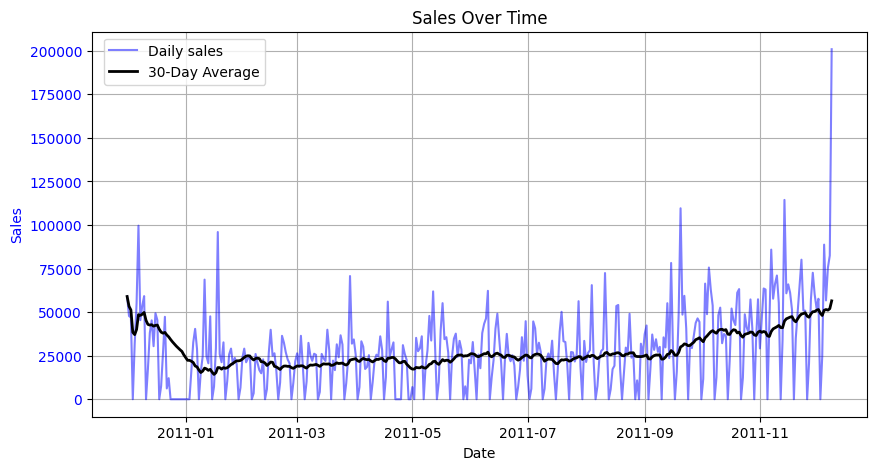

In [21]:
# Plot sales over time
# compute daily revenue
sales_daily = sales.resample('D', on='InvoiceDate').Price.sum().reset_index()
sales_daily.rename(columns={'Price': 'Revenue'}, inplace=True)

# compute revenue moving average
window_size = 30
sales_daily['Revenue_MA'] = sales_daily.Revenue.rolling(window=window_size, min_periods=1).mean()

# plot
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(sales_daily.InvoiceDate, sales_daily.Revenue, color='b', linestyle='solid', label='Daily sales', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.plot(sales_daily.InvoiceDate, sales_daily.Revenue_MA, color='black', linestyle='solid', linewidth=2, label='{window_size}-Day Average'.format(window_size=window_size))

# add title and legend
plt.title('Sales Over Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.13, 0.88))
plt.grid()

plt.show()

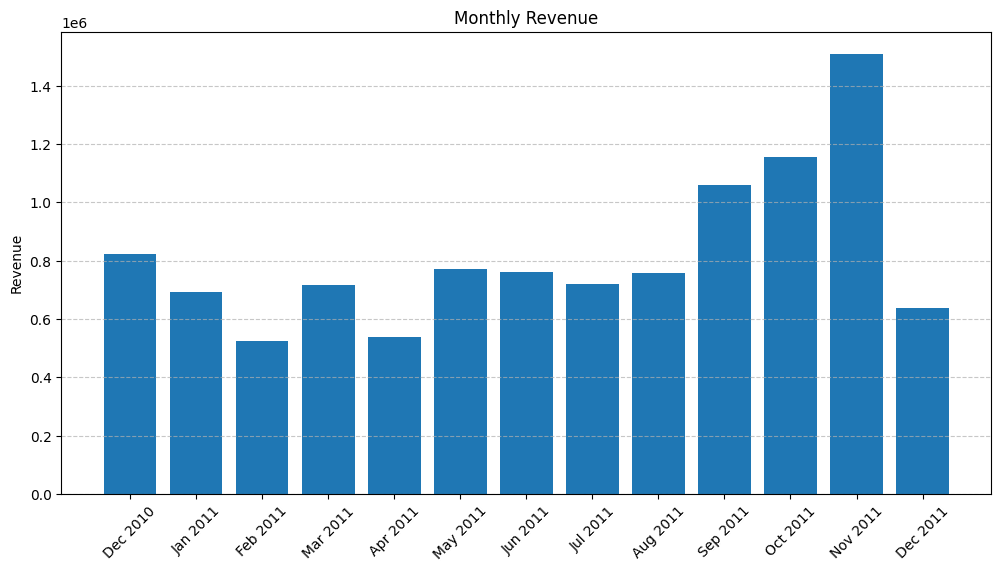

In [22]:
# Plot monthly revenue
sales_monthly = sales.resample('ME', on='InvoiceDate')['Price'].sum().reset_index()
sales_monthly['MonthYear'] = sales_monthly.InvoiceDate.dt.strftime('%b %Y')
sales_monthly.rename(columns={'Price': 'Revenue'}, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(sales_monthly.MonthYear, sales_monthly.Revenue)

plt.xlabel('')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

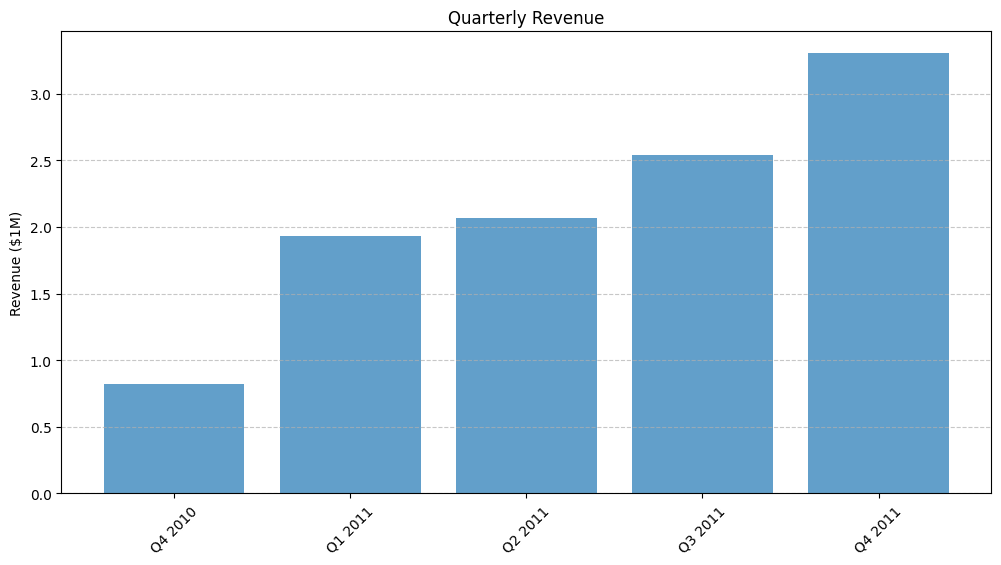

In [23]:
# Plot monthly sales

# Aggregate total sales per month
sales_quarterly = sales.resample('QE', on='InvoiceDate')['Price'].sum().reset_index()
sales_quarterly['QuarterYear'] = 'Q' + sales_quarterly.InvoiceDate.dt.quarter.astype(str) + ' ' + sales_quarterly.InvoiceDate.dt.year.astype(str)
sales_quarterly.rename(columns={'Price': 'Revenue'}, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(sales_quarterly.QuarterYear, sales_quarterly.Revenue/1e6, linestyle='solid', alpha=0.7)
plt.xlabel('')
plt.ylabel('Revenue ($1M)')
plt.title('Quarterly Revenue')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity

plt.show()

In [24]:
# See the most returned products
returns[['StockCode', 'Price']].groupby('StockCode').sum()\
                                 .sort_values(by='Price', ascending=True) \
                                 .head()

,Price
StockCode,
AMAZONFEE,-235281.59
23843,-168469.60
M,-146784.46
23166,-77479.64
POST,-11871.24


There are some codes here that are used for things that are not specific the e-commerce product sales. They may be for internal use, or for Amazon fees or postage. The task brief pertains only to e-commerce products for this task, so I will drop these stock codes and continue.

In [25]:
# Remove stock codes that are either for internal use or 
exclude_stockcodes = ['M', 'D', 'S', 'AMAZONFEE', 'BANK CHARGES', 'CRUK', 'POST', 'DOT']
condition = lambda d: ~(d.StockCode.isin(exclude_stockcodes))
df_excl = df[condition(df)]
sales_excl, returns_excl = split_into_sales_and_returns(df_excl)

# Aggregate sales data
sales_agg = sales_excl[['StockCode', 'Quantity', 'Price']] \
        .groupby('StockCode').agg(
            record_count=('Quantity', 'sum'), # Sum of quantities
            total_price=('Price', 'sum')      # Sum of price column
        ).reset_index().sort_values(by='total_price', ascending=False)
sales_agg.rename(columns={'record_count': 'Purchased', 'total_price': 'Revenue'}, inplace=True)
sales_agg.head()

,StockCode,Purchased,Revenue
1310,22423,13879,174484.74
2465,23843,80995,168469.60
3407,85123A,37660,104518.80
2670,47566,18295,99504.33
3387,85099B,48474,94340.05


In [26]:
# Aggregate returns data
returns_agg = returns_excl[['StockCode', 'Quantity', 'Price']] \
            .groupby('StockCode').agg(
                record_count=('Quantity', 'sum'), # Sum of quantities
                total_price=('Price', 'sum')      # Sum of price column
            ).reset_index().sort_values(by='total_price', ascending=True)
returns_agg.rename(columns={'record_count': 'Returned', 'total_price': 'ReturnValue'}, inplace=True)
returns_agg.head()

,StockCode,Returned,ReturnValue
1507,23843,-80995,-168469.60
1255,23166,-74494,-77479.64
716,22423,-857,-9722.55
1831,85123A,-2578,-6624.30
133,21108,-3150,-6591.42


In [27]:
# Merge both together to compute rate of return
df_merged = sales_agg.merge(returns_agg, on='StockCode')
df_merged['ReturnRate'] = df_merged['Returned'].abs() / df_merged['Purchased']
df_merged = df_merged[['StockCode', 'Purchased', 'Returned', 'ReturnRate', 'Revenue', 'ReturnValue']] # reorder columns

avg_ReturnRate = df_merged.ReturnRate.mean() # compute average return rate
std_ReturnRate = df_merged.ReturnRate.std() # compute standard deviation of return rate

# Show items with highest return rate (> 1 standard deviation above the mean)
df_merged[df_merged.ReturnRate > (avg_ReturnRate + std_ReturnRate)].sort_values(by='ReturnRate', ascending=False)

,StockCode,Purchased,Returned,ReturnRate,Revenue,ReturnValue
1924,20703,1,-7,7.000000,4.25,-29.75
1917,21144,5,-12,2.400000,16.80,-4.56
1907,79323P,4,-8,2.000000,27.00,-54.00
1846,35400,10,-16,1.600000,89.50,-135.20
1918,72815,3,-4,1.333333,15.97,-15.00
...,...,...,...,...,...,...
1869,90202A,22,-6,0.272727,64.28,-17.70
1868,90202D,22,-6,0.272727,64.46,-17.70
1172,22363,481,-130,0.270270,1383.75,-335.50
1800,84799,224,-60,0.267857,160.48,-35.16


Return rate > 1.0 (or 100%) for some products.


In [28]:
# See items with outlying return rate
df_merged[df_merged.ReturnRate > 1.0].sort_values(by='ReturnRate', ascending=False)

,StockCode,Purchased,Returned,ReturnRate,Revenue,ReturnValue
1924,20703,1,-7,7.000000,4.25,-29.75
1917,21144,5,-12,2.400000,16.80,-4.56
1907,79323P,4,-8,2.000000,27.00,-54.00
1846,35400,10,-16,1.600000,89.50,-135.20
1918,72815,3,-4,1.333333,15.97,-15.00
1923,22034,10,-12,1.200000,5.02,-5.04
1891,84750A,24,-27,1.125000,46.80,-52.65


- 8 records with return rate over 100%. 

- I hypothesise that this is due to the limited time window over which the data exists. Some or all of the products may have been purchased before the start date of the dataset, but returned within the time window, leading to a misleading return rate.

- It is important to note, that this could be the case for any item, even ones with return rates under or equal to 100%.

Drop these records as the data is clearly incorrect.

In [29]:
# Drop records
df_merged = df_merged[df_merged.ReturnRate <= 1.0]

# Recalculate mean and standard deviation as they've now changed
avg_ReturnRate = df_merged.ReturnRate.mean()
std_ReturnRate = df_merged.ReturnRate.std()


most_returned = df_merged[df_merged.ReturnRate > (avg_ReturnRate + std_ReturnRate)].sort_values(by='ReturnRate', ascending=False)

Now 134 records with a return rate over one standard deviation above the mean. This has increased, due to both the mean and standard deviation decreasing as a result of dropping the outlying `ReturnRate` values.

In [30]:
most_returned = most_returned.sort_values(by=['ReturnValue', 'ReturnRate'], ascending=[True, False])
most_returned.head()

,StockCode,Purchased,Returned,ReturnRate,Revenue,ReturnValue
1,23843,80995,-80995,1.000000,168469.60,-168469.60
5,23166,78033,-74494,0.954647,81700.92,-77479.64
103,21108,10253,-3150,0.307227,18069.28,-6591.42
419,23113,1154,-946,0.819757,5868.50,-4803.06
58,48185,3617,-674,0.186342,23888.81,-4554.90


It's clear that the top two products are responsible for a large portion of the total missed revenue due to a high number of returns.

In [31]:
# Check percentage of total return value for top 2 items
num_items = 2
x = 100*most_returned[:num_items].ReturnValue.sum()/df_merged.ReturnValue.sum() # percentage of total return value for top 2 items
str(np.round(x, 2).item()) + '%'

'51.42%'

In [41]:
# Get stock codes for the two most impactful return items
sc1 = most_returned.copy().iloc[0].StockCode
sc2 = most_returned.copy().iloc[1].StockCode

In [43]:
# Fetch records pertaining to most impactful returned item
df[df.StockCode == sc1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.6


In [44]:
# Fetch records pertaining to most impactful returned item
df[df.StockCode == sc2]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-05-12 10:10:00,1.04,14646,Netherlands,99.84
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-05-12 12:11:00,1.25,16745,United Kingdom,5.00
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2011-05-12 16:29:00,1.25,14651,United Kingdom,6.25
...,...,...,...,...,...,...,...,...,...
533742,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-07 12:16:00,1.25,15984,United Kingdom,2.50
536248,581219,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2011-12-08 09:28:00,2.46,<NA>,United Kingdom,2.46
539776,581439,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-08 16:30:00,2.46,<NA>,United Kingdom,4.92
540301,581476,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,2011-12-09 08:48:00,1.04,12433,Norway,49.92


From the above two tables, it's clear that it is not necessarily a defect with these products, but rather the return of two extremely large orders that contributes so strongly to the total return amount. My recommendation would be for sales to follow up on these orders and find out why the customer was not satisfied. If rectified, the return is over $250k.

# Conclusion


#### Business outcomes
- View of busy sale periods (monthly and quarterly) throughout 2011
- Two orders for sales to follow up on, and if rectified, would reduce return revenue loss by over $250k (or 50%) for the entire year
#### Recommendations for future improvements
- Improve data quality, which speeds up analysis and saves the business money
  - CustomerIDs should not be floats (all records)
  - Provide missing CustomerIDs (135k records)
  - Uplift data capturing processes to avoid many non-specific descriptions such as "?" or "Check" (ie. use a picklist)
  - Investigate and rectify how an item can have a negative unit price (2 records found)
  - Separate product data and extraneous data (eg. Amazon Fees and Bank Fees) into separate datasets
- Provide me with multiple years of data (instead of only 2011) so I can forecast sales in upcoming years (more data = more accuracy)